In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


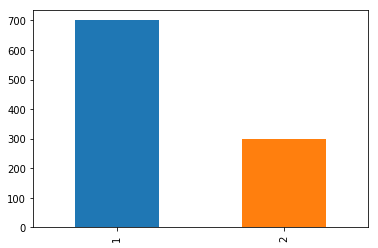

In [4]:
df.default.value_counts().plot.bar()

In [5]:
df.default.value_counts() / len(df.default)

1    0.7
2    0.3
Name: default, dtype: float64

In [6]:
target = "default"
y = np.where(df.default == 2, 1, 0)
X = df.copy()
del X[target]

X_dummy = pd.get_dummies(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)



Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [18]:
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
months_loan_duration                     1000 non-null int64
amount                                   1000 non-null int64
installment_rate                         1000 non-null int64
residence_history                        1000 non-null int64
age                                      1000 non-null int64
existing_credits                         1000 non-null int64
dependents                               1000 non-null int64
checking_balance_1 - 200 DM              1000 non-null uint8
checking_balance_< 0 DM                  1000 non-null uint8
checking_balance_> 200 DM                1000 non-null uint8
checking_balance_unknown                 1000 non-null uint8
credit_history_critical                  1000 non-null uint8
credit_history_delayed                   1000 non-null uint8
credit_history_fully repaid              1000 non-null uint8
credit_history_fully repaid this bank   

In [7]:
y_test_pred = pipe.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.7

In [8]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a0abf2ba8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0ac36f60>)

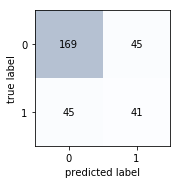

In [9]:
 plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [16]:
pd.DataFrame(pipe.predict_proba(X_test), columns=["P(y=0)", "P(y=1)"]).head()

,P(y=0),P(y=1)
0,0.994141,0.005859
1,0.000013,0.999987
2,0.364044,0.635956
3,0.004376,0.995624
4,0.903513,0.096487


(<matplotlib.figure.Figure at 0x1a0ac59a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0ac52cf8>)

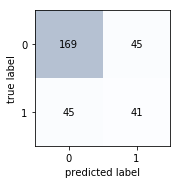

In [10]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>=0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a0acd3a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0ac596a0>)

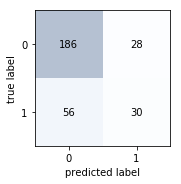

In [11]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a0ad24fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a11933898>)

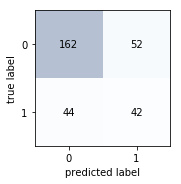

In [12]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

Text(0,0.5,'TPR')

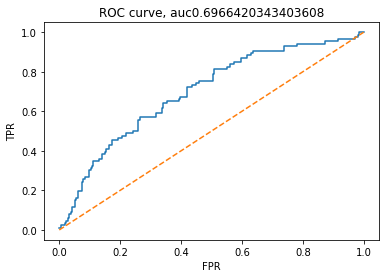

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
auc = metrics.auc(fpr, tpr)
plt.title("ROC curve, auc" + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")